#Artwork recommandation system

#  Library's

In [ ]:
import pandas as pd
import numpy as np

# Data Preprocess

WikiArt Data-Source : https://www.kaggle.com/datasets/steubk/wikiart
# importation des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## CSV File
wclass_df = pd.read_csv('/content/drive/MyDrive/DATA/wclasses.csv')

In [ ]:
wclass_df.head(10)

,file,artist,genre,style
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163
5,Art_Nouveau_Modern/boris-kustodiev_meeting-eas...,1,131,143
6,Realism/vincent-van-gogh_vase-with-asters-and-...,22,139,161
7,Romanticism/ivan-aivazovsky_night-in-the-ukrai...,9,133,163
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157
9,Realism/john-singer-sargent_leon-delafosse.jpg,11,135,161


In [ ]:
wclass_df[['Dir','image']] = wclass_df['file'].str.split('/', 1, expand=True)
wclass_df.head(10)

<ipython-input-12-b13b12274ae6>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wclass_df[['Dir','image']] = wclass_df['file'].str.split('/', 1, expand=True)


,file,artist,genre,style,Dir,image
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160,Post_Impressionism,paul-cezanne_portrait-of-the-artist-s-son.jpg
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152,Impressionism,pierre-auguste-renoir_young-girl-seated-in-a-m...
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163,Romanticism,ivan-aivazovsky_morning-1851.jpg
5,Art_Nouveau_Modern/boris-kustodiev_meeting-eas...,1,131,143,Art_Nouveau_Modern,boris-kustodiev_meeting-easter-day-1917.jpg
6,Realism/vincent-van-gogh_vase-with-asters-and-...,22,139,161,Realism,vincent-van-gogh_vase-with-asters-and-phlox-18...
7,Romanticism/ivan-aivazovsky_night-in-the-ukrai...,9,133,163,Romanticism,ivan-aivazovsky_night-in-the-ukraine-1871.jpg
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157,Northern_Renaissance,albrecht-durer_deposition-engraved-passion-151...
9,Realism/john-singer-sargent_leon-delafosse.jpg,11,135,161,Realism,john-singer-sargent_leon-delafosse.jpg


In [ ]:
wclass_df[['artist_name','image_description']] = wclass_df['image'].str.split('_', 1, expand=True)
wclass_df.head(10)

<ipython-input-13-8cb56d4fc732>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  wclass_df[['artist_name','image_description']] = wclass_df['image'].str.split('_', 1, expand=True)


,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent-van-gogh,pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the-angel-appearing-to-the-shepherds-1634.jpg
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160,Post_Impressionism,paul-cezanne_portrait-of-the-artist-s-son.jpg,paul-cezanne,portrait-of-the-artist-s-son.jpg
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152,Impressionism,pierre-auguste-renoir_young-girl-seated-in-a-m...,pierre-auguste-renoir,young-girl-seated-in-a-meadow-1916.jpg
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163,Romanticism,ivan-aivazovsky_morning-1851.jpg,ivan-aivazovsky,morning-1851.jpg
5,Art_Nouveau_Modern/boris-kustodiev_meeting-eas...,1,131,143,Art_Nouveau_Modern,boris-kustodiev_meeting-easter-day-1917.jpg,boris-kustodiev,meeting-easter-day-1917.jpg
6,Realism/vincent-van-gogh_vase-with-asters-and-...,22,139,161,Realism,vincent-van-gogh_vase-with-asters-and-phlox-18...,vincent-van-gogh,vase-with-asters-and-phlox-1886.jpg
7,Romanticism/ivan-aivazovsky_night-in-the-ukrai...,9,133,163,Romanticism,ivan-aivazovsky_night-in-the-ukraine-1871.jpg,ivan-aivazovsky,night-in-the-ukraine-1871.jpg
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157,Northern_Renaissance,albrecht-durer_deposition-engraved-passion-151...,albrecht-durer,deposition-engraved-passion-1512.jpg
9,Realism/john-singer-sargent_leon-delafosse.jpg,11,135,161,Realism,john-singer-sargent_leon-delafosse.jpg,john-singer-sargent,leon-delafosse.jpg


In [ ]:
## Split by -
wclass_df['artist_name'] = wclass_df['artist_name'].str.split('-')
## Join Split Coloum for Artist Coloum
wclass_df['artist_name'] = wclass_df['artist_name'].str.join(' ')
wclass_df.head(10)


,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent van gogh,pine-trees-in-the-fen-1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the-angel-appearing-to-the-shepherds-1634.jpg
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160,Post_Impressionism,paul-cezanne_portrait-of-the-artist-s-son.jpg,paul cezanne,portrait-of-the-artist-s-son.jpg
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152,Impressionism,pierre-auguste-renoir_young-girl-seated-in-a-m...,pierre auguste renoir,young-girl-seated-in-a-meadow-1916.jpg
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163,Romanticism,ivan-aivazovsky_morning-1851.jpg,ivan aivazovsky,morning-1851.jpg
5,Art_Nouveau_Modern/boris-kustodiev_meeting-eas...,1,131,143,Art_Nouveau_Modern,boris-kustodiev_meeting-easter-day-1917.jpg,boris kustodiev,meeting-easter-day-1917.jpg
6,Realism/vincent-van-gogh_vase-with-asters-and-...,22,139,161,Realism,vincent-van-gogh_vase-with-asters-and-phlox-18...,vincent van gogh,vase-with-asters-and-phlox-1886.jpg
7,Romanticism/ivan-aivazovsky_night-in-the-ukrai...,9,133,163,Romanticism,ivan-aivazovsky_night-in-the-ukraine-1871.jpg,ivan aivazovsky,night-in-the-ukraine-1871.jpg
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157,Northern_Renaissance,albrecht-durer_deposition-engraved-passion-151...,albrecht durer,deposition-engraved-passion-1512.jpg
9,Realism/john-singer-sargent_leon-delafosse.jpg,11,135,161,Realism,john-singer-sargent_leon-delafosse.jpg,john singer sargent,leon-delafosse.jpg


In [ ]:
## Remove last number and .jpg from image description
wclass_df['image_description'] = wclass_df['image_description'].str.replace(r'\d+\.jpg$', '', regex=True)

In [ ]:
## Remove Remmaning Images Which Does not Have Number but have .jpg at End
wclass_df['image_description'] = wclass_df['image_description'].str.replace(r'.jpg','',regex=True)

In [ ]:
## Split by -
wclass_df['image_description'] = wclass_df['image_description'].str.split('-')
## Join Split Coloum for image_description Coloum
wclass_df['image_description'] = wclass_df['image_description'].str.join(' ')
wclass_df.head(10)

,file,artist,genre,style,Dir,image,artist_name,image_description
0,Realism/vincent-van-gogh_pine-trees-in-the-fen...,22,133,161,Realism,vincent-van-gogh_pine-trees-in-the-fen-1884.jpg,vincent van gogh,pine trees in the fen 1884.jpg
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds 1634.jpg
2,Post_Impressionism/paul-cezanne_portrait-of-th...,16,135,160,Post_Impressionism,paul-cezanne_portrait-of-the-artist-s-son.jpg,paul cezanne,portrait of the artist s son.jpg
3,Impressionism/pierre-auguste-renoir_young-girl...,17,131,152,Impressionism,pierre-auguste-renoir_young-girl-seated-in-a-m...,pierre auguste renoir,young girl seated in a meadow 1916.jpg
4,Romanticism/ivan-aivazovsky_morning-1851.jpg,9,139,163,Romanticism,ivan-aivazovsky_morning-1851.jpg,ivan aivazovsky,morning 1851.jpg
5,Art_Nouveau_Modern/boris-kustodiev_meeting-eas...,1,131,143,Art_Nouveau_Modern,boris-kustodiev_meeting-easter-day-1917.jpg,boris kustodiev,meeting easter day 1917.jpg
6,Realism/vincent-van-gogh_vase-with-asters-and-...,22,139,161,Realism,vincent-van-gogh_vase-with-asters-and-phlox-18...,vincent van gogh,vase with asters and phlox 1886.jpg
7,Romanticism/ivan-aivazovsky_night-in-the-ukrai...,9,133,163,Romanticism,ivan-aivazovsky_night-in-the-ukraine-1871.jpg,ivan aivazovsky,night in the ukraine 1871.jpg
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157,Northern_Renaissance,albrecht-durer_deposition-engraved-passion-151...,albrecht durer,deposition engraved passion 1512.jpg
9,Realism/john-singer-sargent_leon-delafosse.jpg,11,135,161,Realism,john-singer-sargent_leon-delafosse.jpg,john singer sargent,leon delafosse.jpg


In [ ]:
## Filter for Baroque only
data_df =  wclass_df[wclass_df['Dir'] == 'Baroque']
data_df.head(10)

,file,artist,genre,style,Dir,image,artist_name,image_description
1,Baroque/rembrandt_the-angel-appearing-to-the-s...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds 1634.jpg
20,Baroque/rembrandt_sick-woman-with-a-large-whit...,20,137,144,Baroque,rembrandt_sick-woman-with-a-large-white-headdr...,rembrandt,sick woman with a large white headdress saskia...
24,Baroque/rembrandt_portrait-of-margeretha-de-ge...,20,135,144,Baroque,rembrandt_portrait-of-margeretha-de-geer-1661.jpg,rembrandt,portrait of margeretha de geer 1661.jpg
39,Baroque/rembrandt_portrait-of-clement-de-jonge...,20,135,144,Baroque,rembrandt_portrait-of-clement-de-jonge-1651.jpg,rembrandt,portrait of clement de jonge 1651.jpg
55,Baroque/rembrandt_portrait-of-joris-de-cauller...,20,135,144,Baroque,rembrandt_portrait-of-joris-de-caullery-1632.jpg,rembrandt,portrait of joris de caullery 1632.jpg
98,Baroque/rembrandt_self-portrait-1659-1.jpg,20,139,144,Baroque,rembrandt_self-portrait-1659-1.jpg,rembrandt,self portrait 1659 1.jpg
111,Baroque/rembrandt_cupid-blowing-soap-bubbles-1...,20,139,144,Baroque,rembrandt_cupid-blowing-soap-bubbles-1634.jpg,rembrandt,cupid blowing soap bubbles 1634.jpg
114,Baroque/rembrandt_the-jewish-bride-1666.jpg,20,131,144,Baroque,rembrandt_the-jewish-bride-1666.jpg,rembrandt,the jewish bride 1666.jpg
127,Baroque/rembrandt_old-man-in-meditation-leanin...,20,137,144,Baroque,rembrandt_old-man-in-meditation-leaning-on-a-b...,rembrandt,old man in meditation leaning on a book 1645.jpg
193,Baroque/rembrandt_self-portrait-open-mouthed-1...,20,139,144,Baroque,rembrandt_self-portrait-open-mouthed-1630.jpg,rembrandt,self portrait open mouthed 1630.jpg


In [ ]:
## Check For All Images in directory with dataframe file path coloum
import os
import glob


# Get the list of files in the directory
file_list = glob.glob(os.path.join('/content/drive/MyDrive/DATA/Baroque', '*'))

# Filter out directories (exclude subdirectories)
file_list = [file for file in file_list if os.path.isfile(file)]

# Print the total number of files
total_files = len(file_list)
print("Total files in the directory:", total_files)

Total files in the directory: 4241


In [ ]:
## Filter out only those images file from dataframe which present in that folder
parent_dir_path = '/content/drive/MyDrive/DATA/'
data_df['file'] = parent_dir_path + data_df['file']

<ipython-input-52-f99e4a125b5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['file'] = parent_dir_path + data_df['file']


In [ ]:
## Save File
data_df.to_csv('/content/drive/MyDrive/DATA/data_df.csv',index=False)

# Exploration:

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

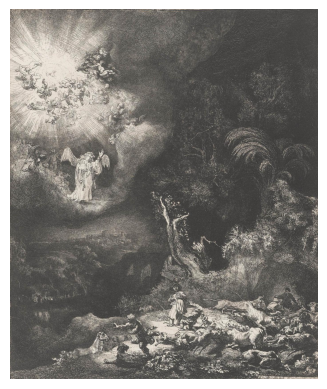

In [ ]:
# Lo
image_path = data_df.iloc[0]['file']  # Update with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Feature Extration

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define a custom dataset for loading images
class ImageDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_paths = [os.path.join(data_dir, img) for img in os.listdir(data_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Set the path to your image data folder
data_dir = '/content/drive/MyDrive/DATA/Baroque'

# Define the transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a custom function to create dataloaders
def create_dataloader(data, batch_size, shuffle):
    return DataLoader(data, batch_size=batch_size, shuffle=shuffle)

# Create the dataset and data loader
dataset = ImageDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Separate some data for validation (you can adjust the split ratio)
val_split = 0.2
num_val = int(val_split * len(dataset))
num_train = len(dataset) - num_val
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [num_train, num_val])

# Create the dataloaders for training and validation
train_dataloader = create_dataloader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = create_dataloader(val_dataset, batch_size=32, shuffle=False)

# Define a simple autoencoder model using ResNet-50 for encoding
class ImageAutoencoder(nn.Module):
    def __init__(self):
        super(ImageAutoencoder, self).__init__()
        self.resnet = resnet50(pretrained=True)
        in_features = self.resnet.fc.in_features

        # Remove the fully connected layer for encoding
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])

        # Add a linear layer for decoding with the appropriate output size
        self.decoder = nn.Linear(in_features, 3 * 224 * 224)  # Output size matches the flattened image size

    def forward(self, x):
        # Encoder: ResNet-50
        x = self.resnet(x)
        # Flatten the output for decoding
        x = x.view(x.size(0), -1)
        # Decoder
        x = self.decoder(x)
        # Reshape back to the original image shape
        x = x.view(x.size(0), 3, 224, 224)
        return x

# Initialize the autoencoder model
model_rs_resnet = ImageAutoencoder()

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_rs_resnet.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model_rs_resnet.parameters(), lr=0.001, momentum=0.9)

# Training loop with validation and results visualization
num_epochs = 15
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model_rs_resnet.train()
    train_loss = 0.0
    for batch in train_dataloader:
        inputs = batch.to(device)

        optimizer.zero_grad()
        outputs = model_rs_resnet(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation
    model_rs_resnet.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_batch in val_dataloader:
            val_inputs = val_batch.to(device)
            val_outputs = model_rs_resnet(val_inputs)
            val_loss += criterion(val_outputs, val_inputs).item()

    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')


Epoch 1/15, Train Loss: 1.4854024749881816, Val Loss: 1.4686483056456954
Epoch 2/15, Train Loss: 1.4791999290574271, Val Loss: 1.464185599927549
Epoch 3/15, Train Loss: 1.472836729490532, Val Loss: 1.4563252175295796
Epoch 4/15, Train Loss: 1.4664109540435504, Val Loss: 1.4518443743387859
Epoch 5/15, Train Loss: 1.4599912830118864, Val Loss: 1.4441136960630063
Epoch 6/15, Train Loss: 1.4534510655223198, Val Loss: 1.43590333726671
Epoch 7/15, Train Loss: 1.44680466404501, Val Loss: 1.4298563974874992
Epoch 8/15, Train Loss: 1.4396831741872824, Val Loss: 1.4179515264652394
Epoch 9/15, Train Loss: 1.4312755859123085, Val Loss: 1.41071938585352
Epoch 10/15, Train Loss: 1.4181986844764565, Val Loss: 1.3931275826913339
Epoch 11/15, Train Loss: 1.3976388202523284, Val Loss: 1.3726866907543607
Epoch 12/15, Train Loss: 1.3851599648313702, Val Loss: 1.3676865851437603
Epoch 13/15, Train Loss: 1.3816393130230453, Val Loss: 1.3643050502847742
Epoch 14/15, Train Loss: 1.3801345195410386, Val Loss: 

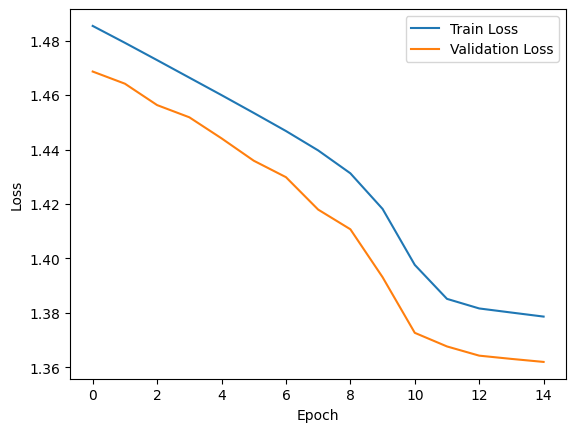

In [ ]:
# Plotting the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#enrigerster le model :
torch.save(model_rs_resnet.state_dict(), 'model_rs_resnet.pth')

In [ ]:
model_path = '/content/drive/MyDrive/model_rs_resnet.pth'
torch.save(model_rs_resnet.state_dict(), model_path)

# partie recommendation

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Définir une fonction pour charger une image et appliquer la transformation
def load_and_transform_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

# Définir une classe pour le dataset
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_paths = [os.path.join(data_dir, img) for img in os.listdir(data_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = load_and_transform_image(image_path)
        return image

# Fonction pour obtenir les vecteurs de caractéristiques des images
def get_feature_vectors(model, dataloader):
    feature_vectors = []
    with torch.no_grad():
        for batch in dataloader:
            input_image = batch[0]  # Prenez la première image du batch
            # Passage de l'image à travers le modèle pour obtenir la reconstruction
            reconstruction = model(input_image)
            # Aplatir le tensor en un vecteur
            feature_vector = reconstruction.view(-1).cpu().numpy()
            feature_vectors.append(feature_vector)
    return np.array(feature_vectors)

# Fonction pour obtenir le vecteur de caractéristiques d'une image donnée
def get_input_feature_vector(model, input_image_path):
    input_image = load_and_transform_image(input_image_path)
    with torch.no_grad():
        # Passage de l'image à travers le modèle pour obtenir la reconstruction
        reconstruction = model(input_image)
    # Aplatir le tensor en un vecteur
    feature_vector = reconstruction.view(-1).cpu().numpy()
    return feature_vector

# Chargement du jeu de données
data_dir = '/content/drive/MyDrive/DATA/Baroque'
dataset = ImageDataset(data_dir, transform=transforms.ToTensor())
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

# Chargement du modèle
autoencoder_model = ImageAutoencoder()
autoencoder_model.load_state_dict(torch.load('model_rs_resnet.pth'))
autoencoder_model.eval()

# Obtention du vecteur de caractéristiques de l'image d'entrée
input_image_path = 'adriaen-brouwer_a-boor-asleep.jpg'
input_feature_vector = get_input_feature_vector(autoencoder_model, input_image_path)

# Obtention des vecteurs de caractéristiques pour toutes les images du jeu de données
all_feature_vectors = get_feature_vectors(autoencoder_model, dataloader)

# Calcul de la similarité cosinus entre l'image d'entrée et toutes les autres images
cosine_similarities = cosine_similarity([input_feature_vector], all_feature_vectors)[0]

# Triage des indices des images en fonction de leur similarité cosinus par rapport à l'image d'entrée
sorted_indices = np.argsort(cosine_similarities)[::-1]

# Affichage des images recommandées
num_recommendations = 5
for i in range(1, num_recommendations + 1):
    recommended_image_index = sorted_indices[i]
    recommended_image_path = os.path.join(data_dir, dataset.image_paths[recommended_image_index])
    recommended_image = Image.open(recommended_image_path)
    recommended_image.show()

In [ ]:
# Extract image features
features = []


with torch.no_grad():
      for images in dataloader:
         try:
            outputs = model(images)
            features.append(outputs)
         except:
            pass

# Concatenate the feature tensors
features = torch.cat(features, dim=0)

# Print the shape of the feature matrix
print(features.shape)

In [ ]:
# torch.save(features, '/content/drive/MyDrive/Art_Work_Reccomendation_Data/WIKIART/image_feature.pt')

In [ ]:
features.shape

In [ ]:
data_df.shape

## Text Feature Extration

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/DATA/data_df.csv')
data_df.shape

(4240, 8)

In [ ]:
### Other Features
df = pd.read_csv('/content/drive/MyDrive/DATA/data_df.csv')
df.head(3)

,file,artist,genre,style,Dir,image,artist_name,image_description
0,/content/drive/MyDrive/DATA/Baroque/rembrandt_...,20,136,144,Baroque,rembrandt_the-angel-appearing-to-the-shepherds...,rembrandt,the angel appearing to the shepherds
1,/content/drive/MyDrive/DATA/Baroque/rembrandt_...,20,137,144,Baroque,rembrandt_sick-woman-with-a-large-white-headdr...,rembrandt,sick woman with a large white headdress saskia
2,/content/drive/MyDrive/DATA/Baroque/rembrandt_...,20,135,144,Baroque,rembrandt_portrait-of-margeretha-de-geer-1661.jpg,rembrandt,portrait of margeretha de geer


In [ ]:
artist_features = (df['artist'].values).reshape(-1,1)
genre_features = df['genre'].values.reshape(-1,1)
style_features = df['style'].values.reshape(-1,1)

artist_features.shape,genre_features.shape,style_features.shape

((4240, 1), (4240, 1), (4240, 1))

#recomandation:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from IPython.display import Image, display
import torch
from torchvision import transforms
from torchvision.models import resnet50
from torchvision import models

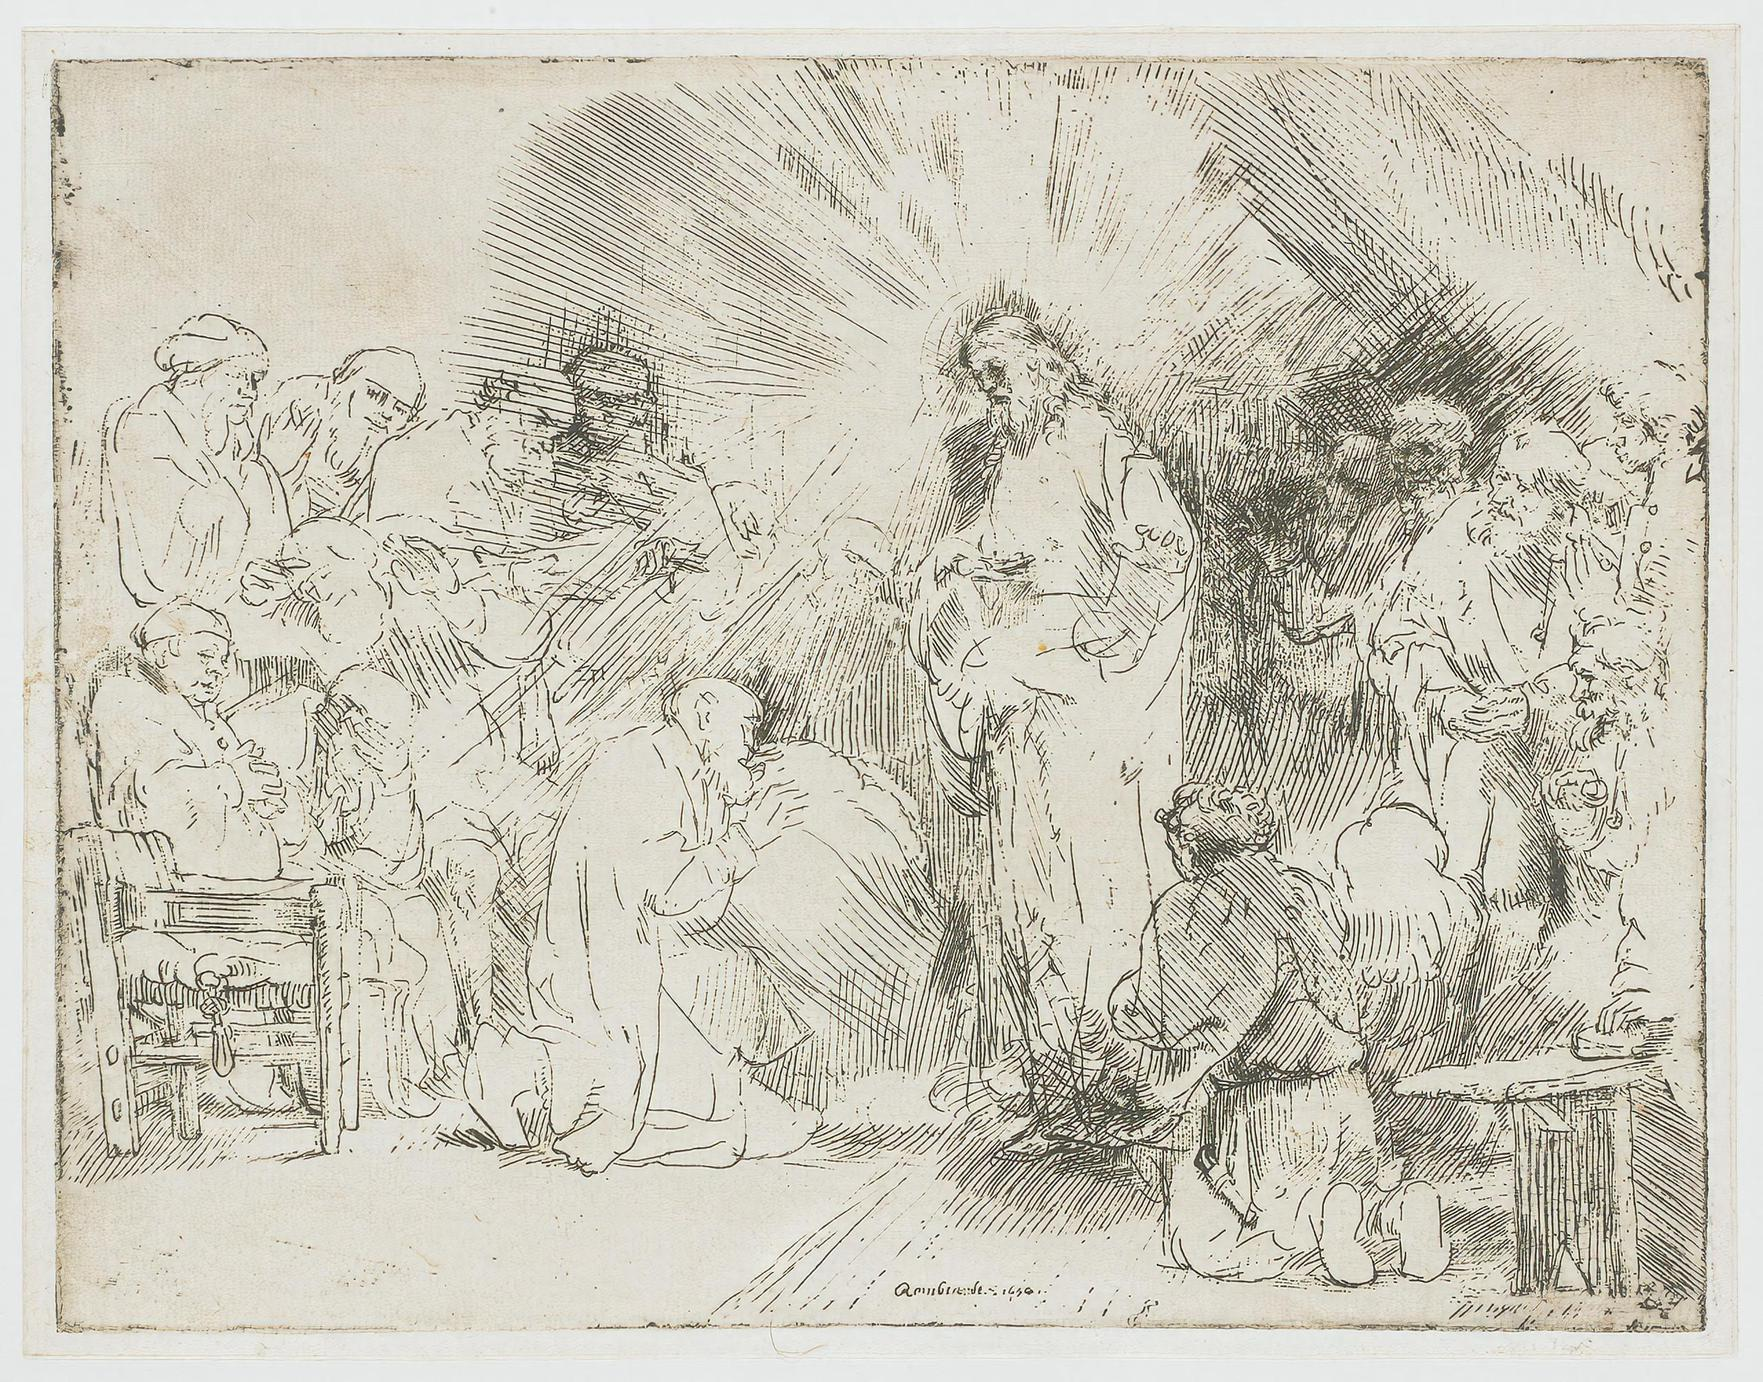

Artist: rembrandt, Description: christ appearing to the apostles 


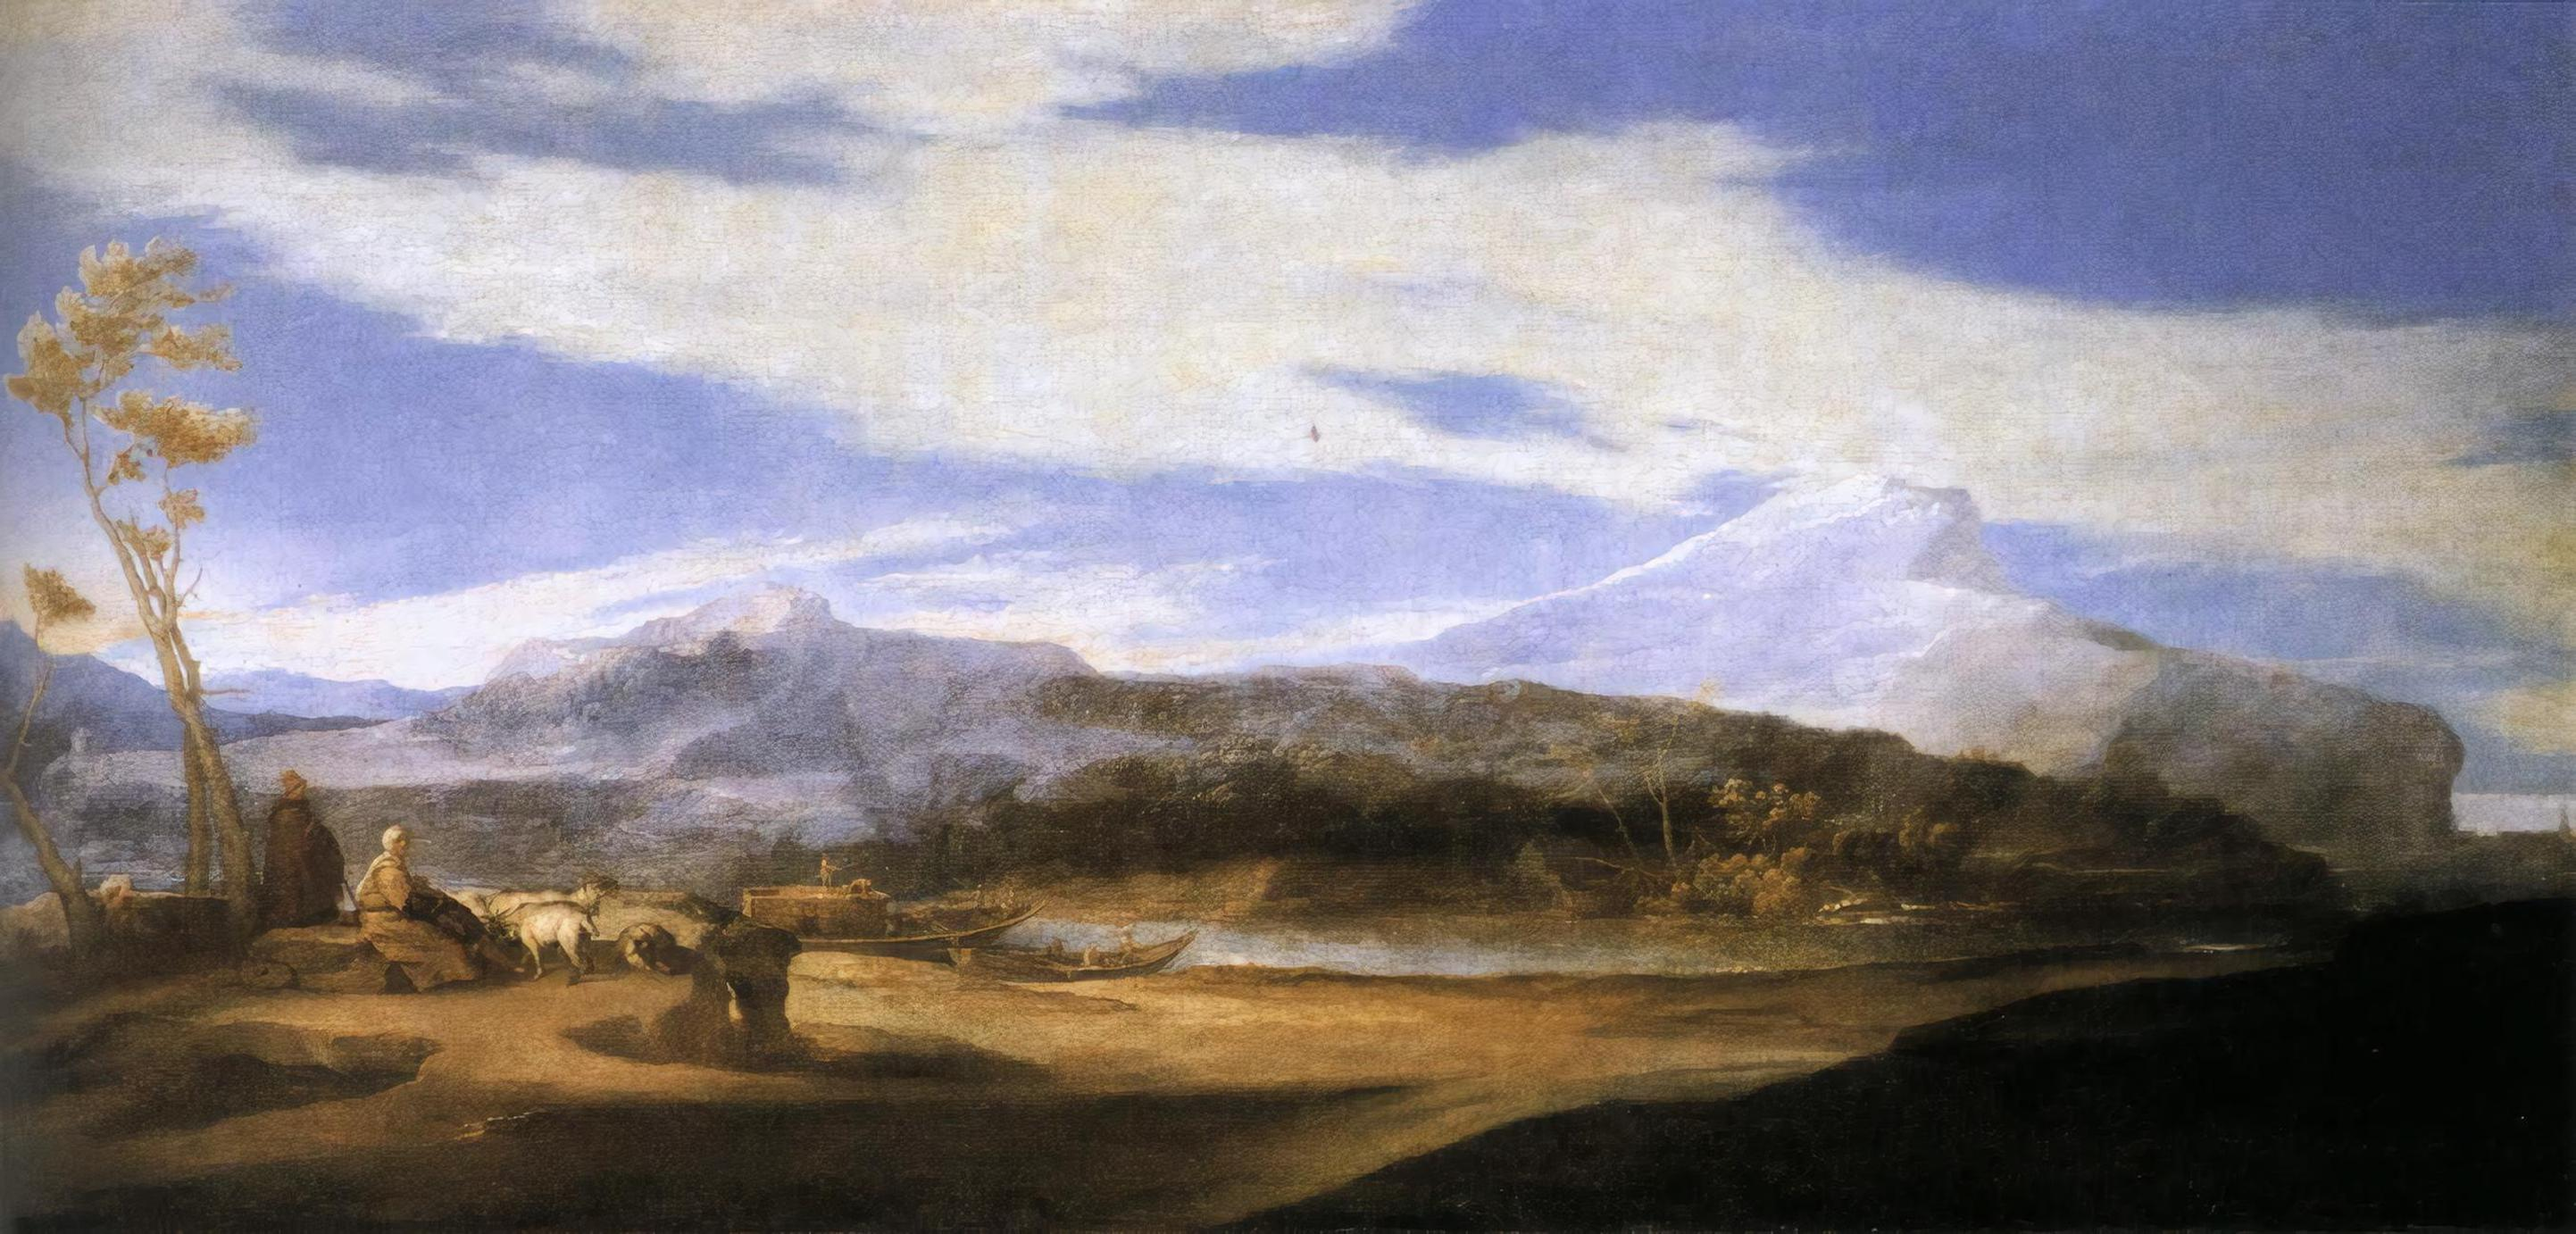

Artist: jusepe de ribera, Description: landscape with shepherds 


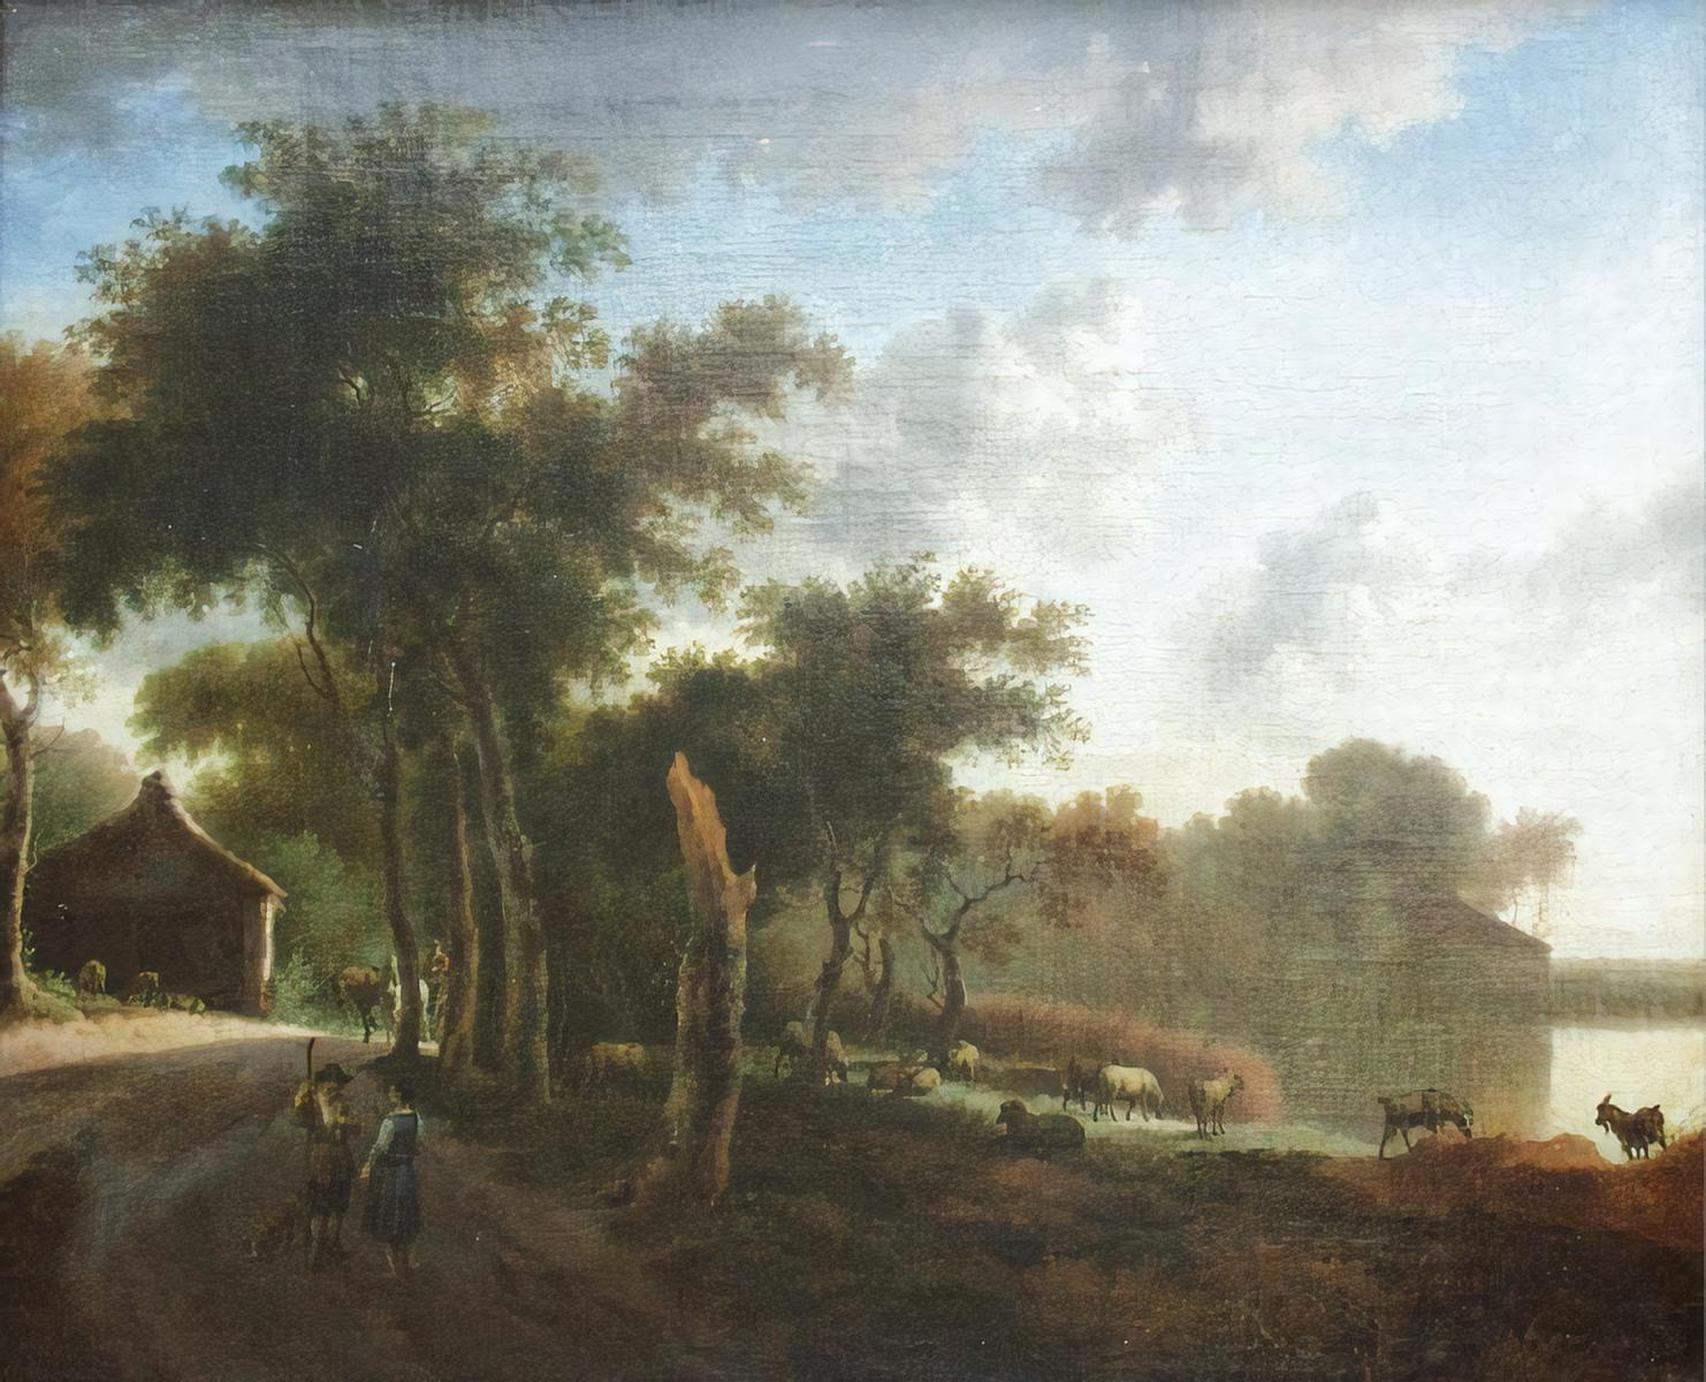

Artist: adriaen van de velde, Description: landscape with shepherds


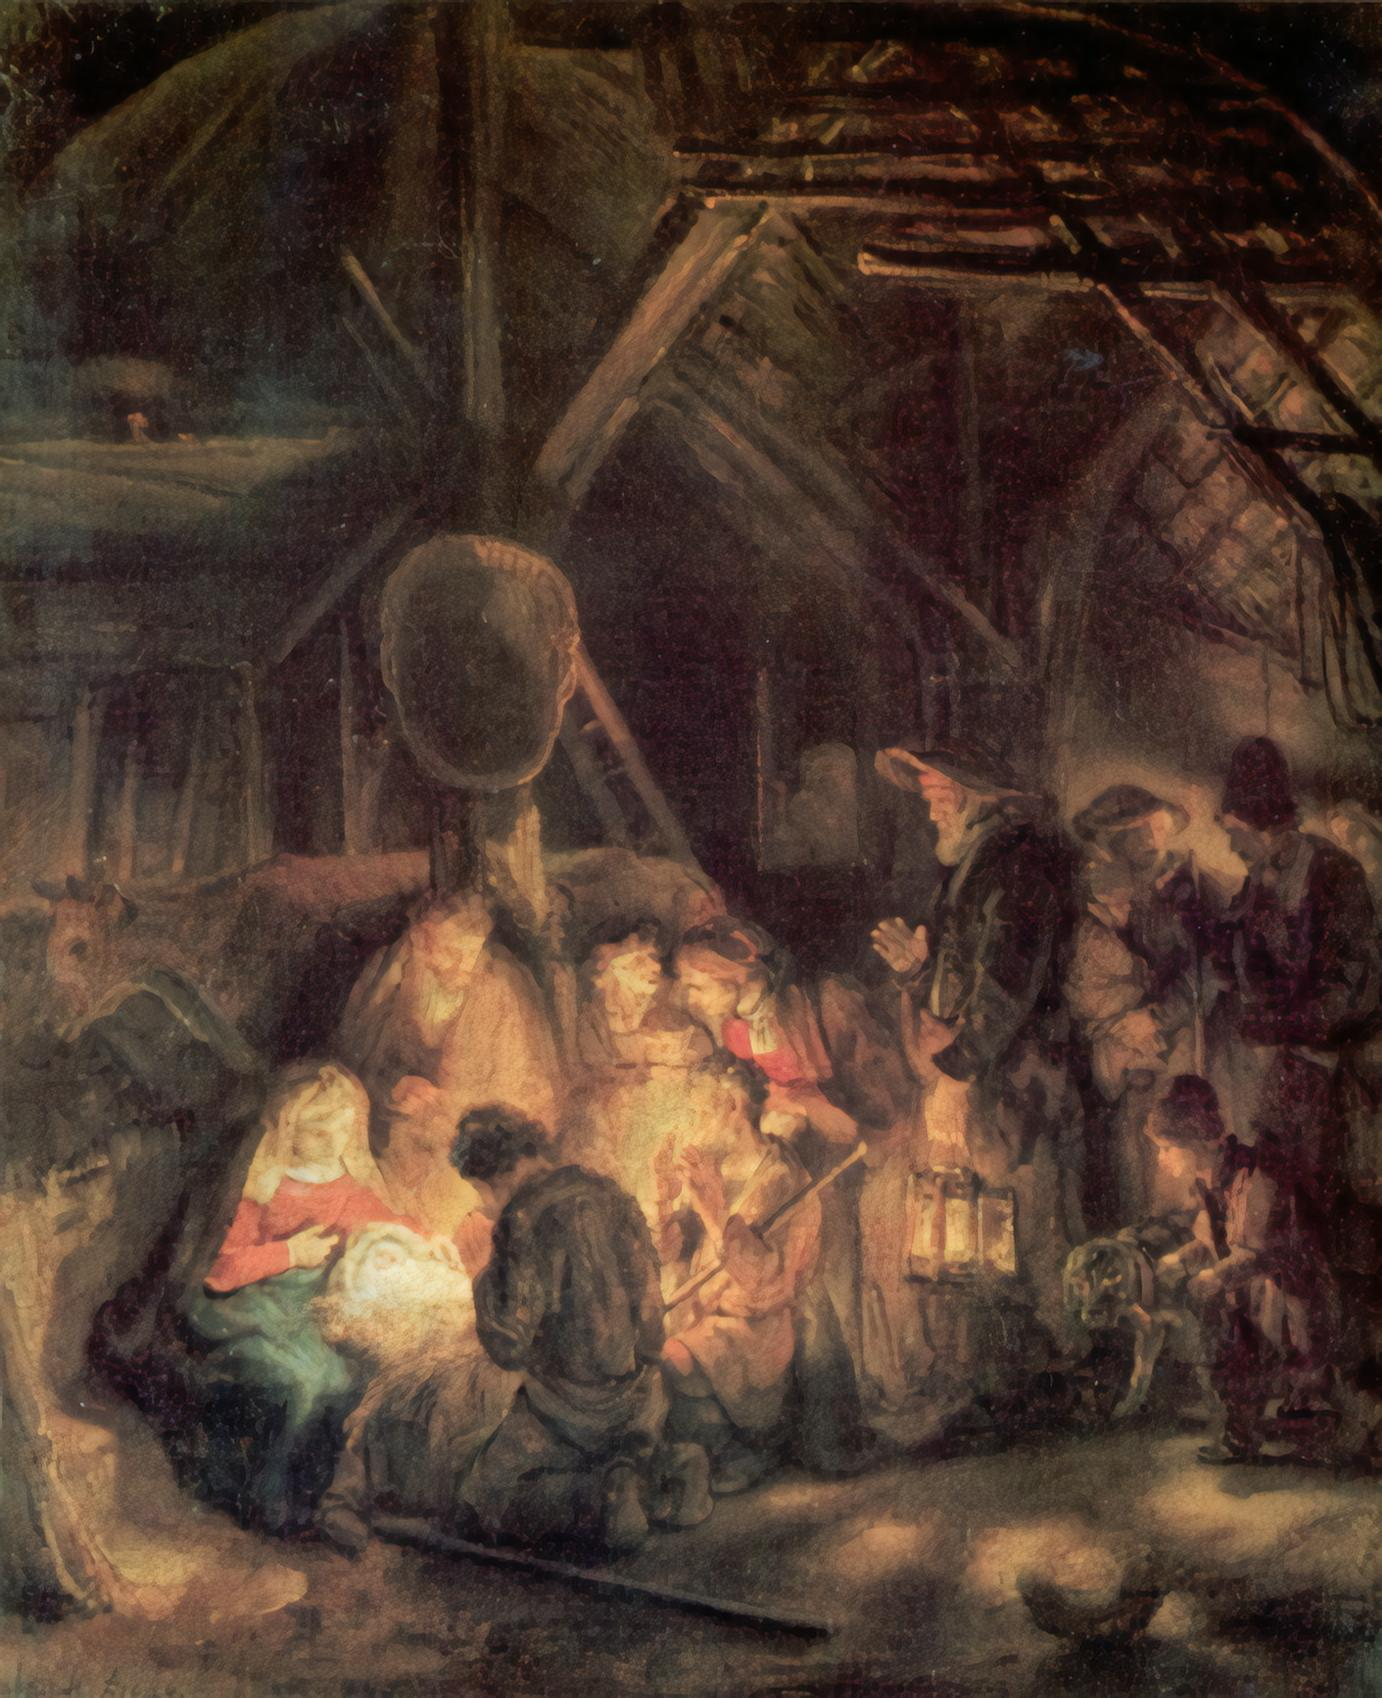

Artist: rembrandt, Description: adoration of the shepherds 


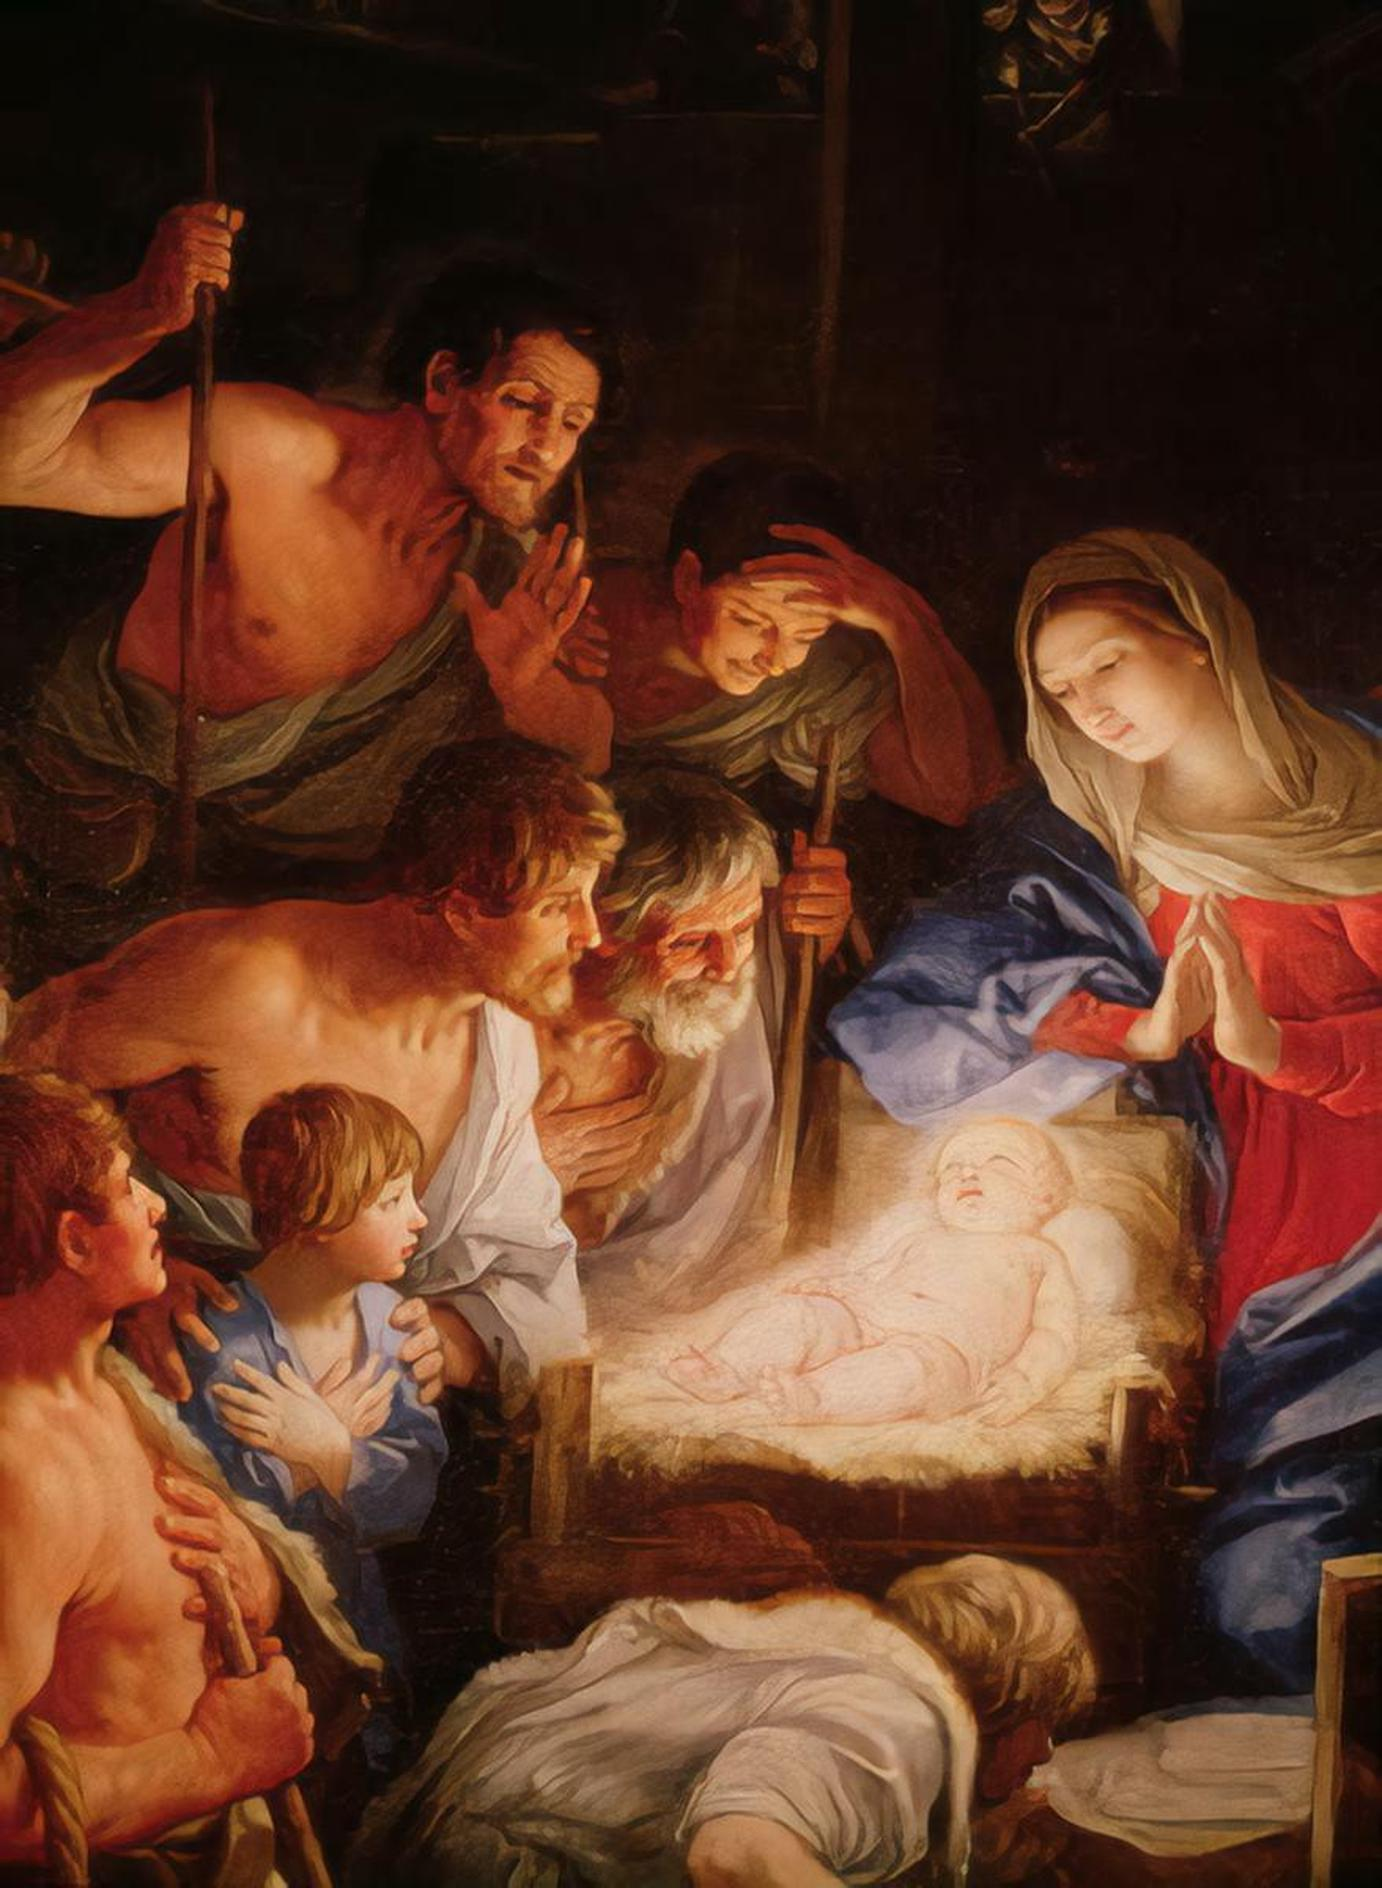

Artist: guido reni, Description: adoration of the shepherds


In [ ]:


# Load the CSV data
df = pd.read_csv('/content/drive/MyDrive/DATA/data_df.csv')

# Preprocess the text data
def preprocess_text(text):
    return str(text)

df['processed_description'] = df['image_description'].apply(preprocess_text)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description'])

# Load the pre-trained ResNet model
resnet_model = models.resnet50(pretrained=False)  # Set pretrained=False to load your custom pre-trained model
model_path = '/content/drive/MyDrive/model_rs_resnet.pth'
resnet_model.load_state_dict(torch.load(model_path))

# Remove the classification layer
resnet_model = torch.nn.Sequential(*(list(resnet_model.children())[:-1]))

# Set the model to evaluation mode
resnet_model.eval()

# Define a function to extract image features using ResNet
def extract_image_features(image_path):
    image = Image.open(image_path).convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    with torch.no_grad():
        output = resnet_model(input_batch)
    return output.squeeze().numpy()

# Apply the function to each image in the dataframe and create a feature matrix
image_features = df['file'].apply(extract_image_features).tolist()
image_features_matrix = torch.tensor(image_features)

# Compute cosine similarity between image features
image_similarity = linear_kernel(image_features_matrix, image_features_matrix)

# Function to get recommendations based on combined features
def combined_recommendations(image_index, top_n=5):
    # Get the similarity scores for the given image
    text_sim_scores = list(enumerate(cosine_sim[image_index]))


* Realiser par : Hicham Chakir et Achraf Kharbab
